In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#pd.pandas.set_option('display.max_columns', None)

In [2]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import os
os.getcwd()

'D:\\faizan\\DSP\\Python\\Projects\\Sentiment Analysis'

In [91]:
dataset = pd.read_csv("Sentiment-140.csv")
dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [92]:
dataset.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
dataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [93]:
dataset.shape

(1599999, 6)

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   id      1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [95]:
dataset.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [96]:
dataset['target'].unique()

array([0, 4], dtype=int64)

<AxesSubplot:xlabel='target', ylabel='count'>

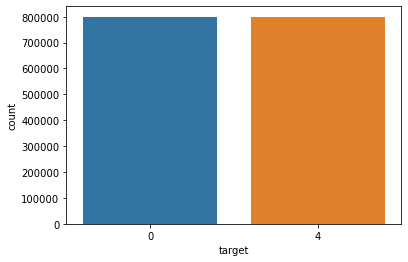

In [97]:
sns.countplot(dataset['target'])

In [99]:
dataset['text'] = dataset['text']
dataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [100]:
dataset = dataset[['target', 'text']]
dataset.sample()

,target,text
1185061,4,@Aishwaryarao So I'm guessing you're absolutel...


In [101]:
dataset['target'].unique()

array([0, 4], dtype=int64)

In [102]:
dataset['target'] = dataset['target'].replace(4,1)
dataset.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [103]:
dataset['target'].unique()

array([0, 1], dtype=int64)

In [104]:
data_pos = dataset[dataset['target'] == 1]
data_neg = dataset[dataset['target'] == 0]

In [105]:
data_pos.shape

(800000, 2)

In [106]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [107]:
data_pos.shape

(20000, 2)

In [108]:
dataset1 = pd.concat([data_pos, data_neg])
dataset1.head()

,target,text
799999,1,I LOVE @Health4UandPets u guys r the best!!
800000,1,im meeting up with one of my besties tonight! ...
800001,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,1,Being sick can be really cheap when it hurts t...
800003,1,@LovesBrooklyn2 he has that effect on everyone


In [109]:
#Lowering the characters
dataset1['text']=dataset1['text'].str.lower()
dataset1['text'].head()

799999         i love @health4uandpets u guys r the best!! 
800000    im meeting up with one of my besties tonight! ...
800001    @darealsunisakim thanks for the twitter add, s...
800002    being sick can be really cheap when it hurts t...
800003      @lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [110]:
type(dataset1['text'])

pandas.core.series.Series

In [111]:
#Removing html tags
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [112]:
dataset1['text'] = dataset1['text'].apply(remove_html_tags)
dataset1.head()

,target,text
799999,1,i love @health4uandpets u guys r the best!!
800000,1,im meeting up with one of my besties tonight! ...
800001,1,"@darealsunisakim thanks for the twitter add, s..."
800002,1,being sick can be really cheap when it hurts t...
800003,1,@lovesbrooklyn2 he has that effect on everyone


In [113]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset1['text'] = dataset1['text'].apply(cleaning_URLs)
dataset1['text'].head()

799999         i love @health4uandpets u guys r the best!! 
800000    im meeting up with one of my besties tonight! ...
800001    @darealsunisakim thanks for the twitter add, s...
800002    being sick can be really cheap when it hurts t...
800003      @lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [114]:
#import string
#english_punctuations = string.punctuation
#punctuations_list = english_punctuations
#def cleaning_punctuations(text):
 #   translator = str.maketrans('', '', punctuations_list)
  #  return text.translate(translator)
#dataset1['text']= dataset1['text'].apply(lambda x: cleaning_punctuations(x))
#dataset1['text'].head()

In [115]:
#Removing Punctuations
import string
exclude = string.punctuation

In [116]:
def remove_punct(text):
    return text.translate(str.maketrans('', '', exclude))
dataset1['text'] = dataset1['text'].apply(remove_punct)
dataset1.head()

,target,text
799999,1,i love health4uandpets u guys r the best
800000,1,im meeting up with one of my besties tonight c...
800001,1,darealsunisakim thanks for the twitter add sun...
800002,1,being sick can be really cheap when it hurts t...
800003,1,lovesbrooklyn2 he has that effect on everyone


In [117]:
import nltk
from nltk.corpus import stopwords

In [118]:
#from wordcloud import WordCloud, STOPWORDS

In [119]:
eng_stopwords = nltk.corpus.stopwords.words('english')

In [120]:
#Removing Stopwords
def cleaning_stopwords(text):
   return " ".join([word for word in str(text).split() if word not in eng_stopwords])
dataset1['text'] = dataset1['text'].apply(lambda text: cleaning_stopwords(text))
dataset1['text'].head()

799999                   love health4uandpets u guys r best
800000    im meeting one besties tonight cant wait girl ...
800001    darealsunisakim thanks twitter add sunisa got ...
800002    sick really cheap hurts much eat real food plu...
800003                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [121]:
#Removing repeated characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset1['text'] = dataset1['text'].apply(lambda x: cleaning_repeating_char(x))
dataset1['text'].head()

799999                   love health4uandpets u guys r best
800000    im meeting one besties tonight cant wait girl ...
800001    darealsunisakim thanks twitter add sunisa got ...
800002    sick really cheap hurts much eat real food plu...
800003                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [122]:
#Removing numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset1['text'] = dataset1['text'].apply(lambda x: cleaning_numbers(x))
dataset1['text'].head()

799999                    love healthuandpets u guys r best
800000    im meeting one besties tonight cant wait girl ...
800001    darealsunisakim thanks twitter add sunisa got ...
800002    sick really cheap hurts much eat real food plu...
800003                        lovesbrooklyn effect everyone
Name: text, dtype: object

In [123]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+") #(r'w+')
dataset1['text'] = dataset1['text'].apply(tokenizer.tokenize)
dataset1['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meeting, one, besties, tonight, cant, wai...
800001    [darealsunisakim, thanks, twitter, add, sunisa...
800002    [sick, really, cheap, hurts, much, eat, real, ...
800003                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [124]:
#Stemming
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset1['text']= dataset1['text'].apply(lambda x: stemming_on_text(x))
dataset1['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meeting, one, besties, tonight, cant, wai...
800001    [darealsunisakim, thanks, twitter, add, sunisa...
800002    [sick, really, cheap, hurts, much, eat, real, ...
800003                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [125]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset1['text'] = dataset1['text'].apply(lemmatizer_on_text)
dataset1['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meeting, one, besties, tonight, cant, wai...
800001    [darealsunisakim, thanks, twitter, add, sunisa...
800002    [sick, really, cheap, hurts, much, eat, real, ...
800003                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [126]:
X=dataset1.text
y=dataset1.target

In [127]:
X.head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meeting, one, besties, tonight, cant, wai...
800001    [darealsunisakim, thanks, twitter, add, sunisa...
800002    [sick, really, cheap, hurts, much, eat, real, ...
800003                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [128]:
X.shape

(40000,)

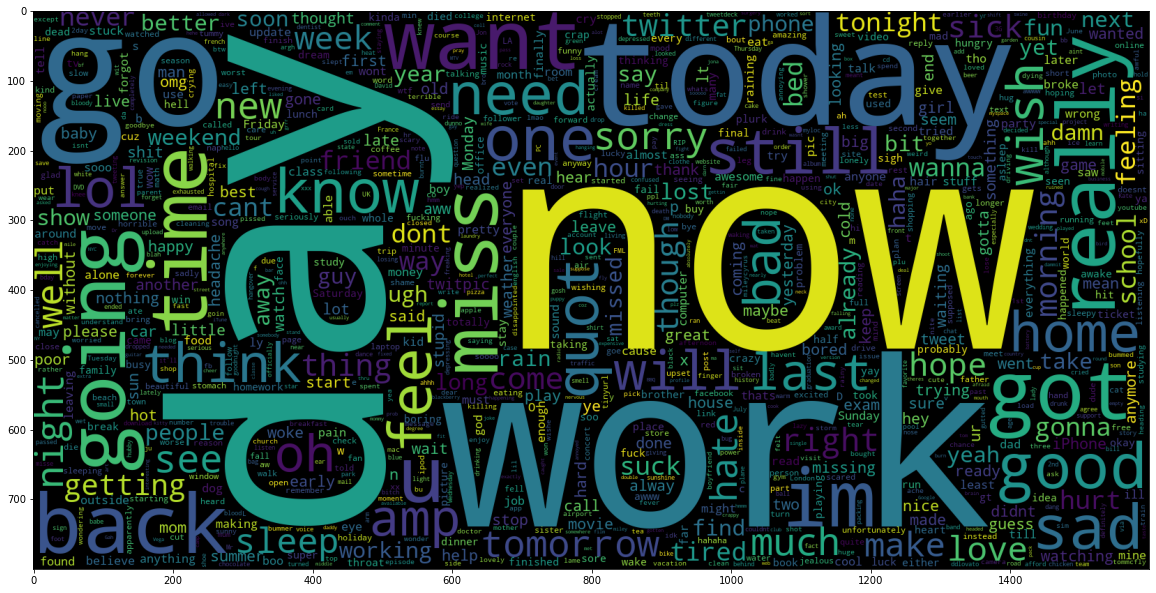

In [34]:
import wordcloud
data_neg = dataset['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

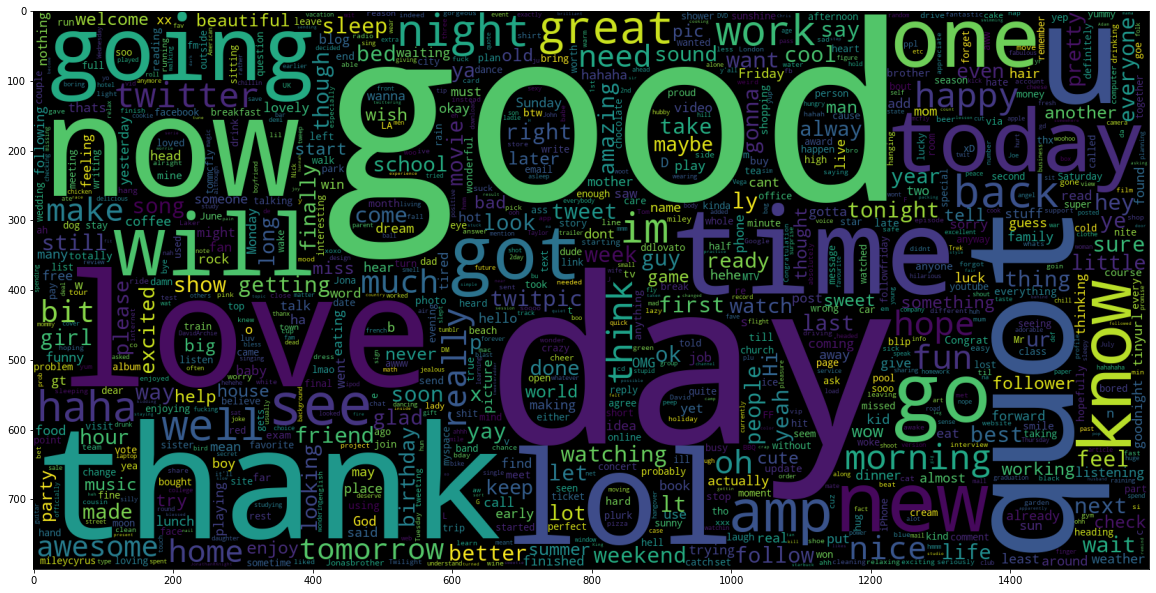

In [35]:
data_pos = dataset['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [87]:
#Converting these tokens into strings to paas into tfidfvectorizer
X=dataset1.text
y=dataset1.target
X.head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meeting, one, besties, tonight, cant, wai...
800001    [darealsunisakim, thanks, twitter, add, sunisa...
800002    [sick, really, cheap, hurts, much, eat, real, ...
800003                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [129]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size = 0.2, random_state =260)
X_train.shape, X_test.shape

((32000,), (8000,))

In [130]:
#from sklearn.feature_extraction.text import CountVectorizer
#bow = CountVectorizer(min_df=2, max_features=500000)
#X_bow = bow.fit_transform(X)

In [131]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  206808


In [132]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [135]:
X_train.shape

(32000, 206808)

In [146]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [137]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred_train_nb = BNBmodel.predict(X_train)
y_pred_test_nb = pd.DataFrame(BNBmodel.predict(X_test))

print(accuracy_score(y_train, y_pred_train_nb))
print(accuracy_score(y_test, y_pred_test_nb))

0.9824375
0.743875


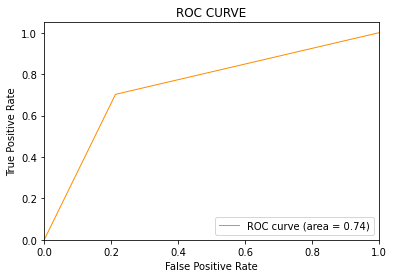

In [139]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_nb, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [150]:
print(classification_report(y_test, y_pred_test_nb))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      3921
           1       0.77      0.70      0.74      4079

    accuracy                           0.74      8000
   macro avg       0.75      0.74      0.74      8000
weighted avg       0.75      0.74      0.74      8000



In [140]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_pred_train_svc = SVCmodel.predict(X_train)
y_pred_test_svc = SVCmodel.predict(X_test)


print(accuracy_score(y_train, y_pred_train_svc))
print(accuracy_score(y_test, y_pred_test_svc))

0.9970625
0.758125


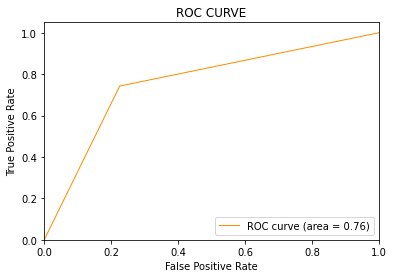

In [141]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_svc, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [149]:
print(classification_report(y_test, y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      3921
           1       0.77      0.74      0.76      4079

    accuracy                           0.76      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.76      0.76      0.76      8000



In [143]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

print(accuracy_score(y_train, y_pred_train_lr))
print(accuracy_score(y_test, y_pred_test_lr))

0.95109375
0.758625


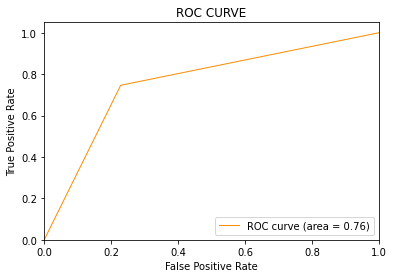

In [144]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_lr, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [148]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      3921
           1       0.77      0.75      0.76      4079

    accuracy                           0.76      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.76      0.76      0.76      8000



Conclusion
Upon evaluating all the models we can conclude the following details i.e.

Accuracy: As far as the accuracy of the model is concerned Logistic Regression and SVM performs better than Bernoulli Naive Bayes.

F1-score: The F1 Scores for class 0 and class 1 are :
(a) For class 0: Bernoulli Naive Bayes(accuracy = 0.75) < SVM (accuracy =0.76) = Logistic Regression (accuracy = 0.76)
(b) For class 1: Bernoulli Naive Bayes (accuracy = 0.74) < SVM (accuracy = 0.76) = Logistic Regression (accuracy = 0.76)

AUC Score: All three models have the same ROC-AUC score.

In [ ]:
#creating pipeline
